In [1]:
# Setup code for the notebook
#%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
import ipytools
import data_loader
import visualization

# Get test datas

In [24]:
images_name = [
    '../testdata/input_pair/img_01.tif',
    '../testdata/input_pair/img_02.tif'
]

In [35]:
rpc_name = [
    '../testdata/input_pair/rpc_01.xml',
    '../testdata/input_pair/rpc_02.xml'
]

In [29]:
roi = {
"x": 150,
"y": 150,
"w": 700,
"h": 700
}

In [30]:
tile_size = 300

# Get images from the video 

In [4]:
folders = data_loader.retrieve_video()

892 images


In [5]:
# Chose a pair of images
i, j = 0, 100
images_name = data_loader.choose_video(folders, [i, j])

In [23]:
images_name

['../data/s02_20150507T020554Z/video_frames/s02_20150507T02055427Z.tif',
 '../data/s02_20150507T020554Z/video_frames/s02_20150507T02055760Z.tif']

In [ ]:
roi = {
    "x": 0,
    "y": 0,
    "w": 1000,
    "h": 1000
  }

In [ ]:
tile_size = 1000
rpc_name = []

# Get Triplets

In [90]:
folders = data_loader.retrieve_triplets()

In [91]:
# Chose a pair of images
d = 2
i = 9
indices = ['1107', '1148']#, '1231']
images_name = data_loader.choose_triplets(folders, d, i, indices)

In [ ]:
roi = {
    "x": 0,
    "y": 0,
    "w": 1000,
    "h": 1000
  }

In [ ]:
tile_size = 1000
rpc_name = []

# Visualize chosen images

Dimension:  (1024, 1024, 1)
Dimension:  (1102, 1031, 1)



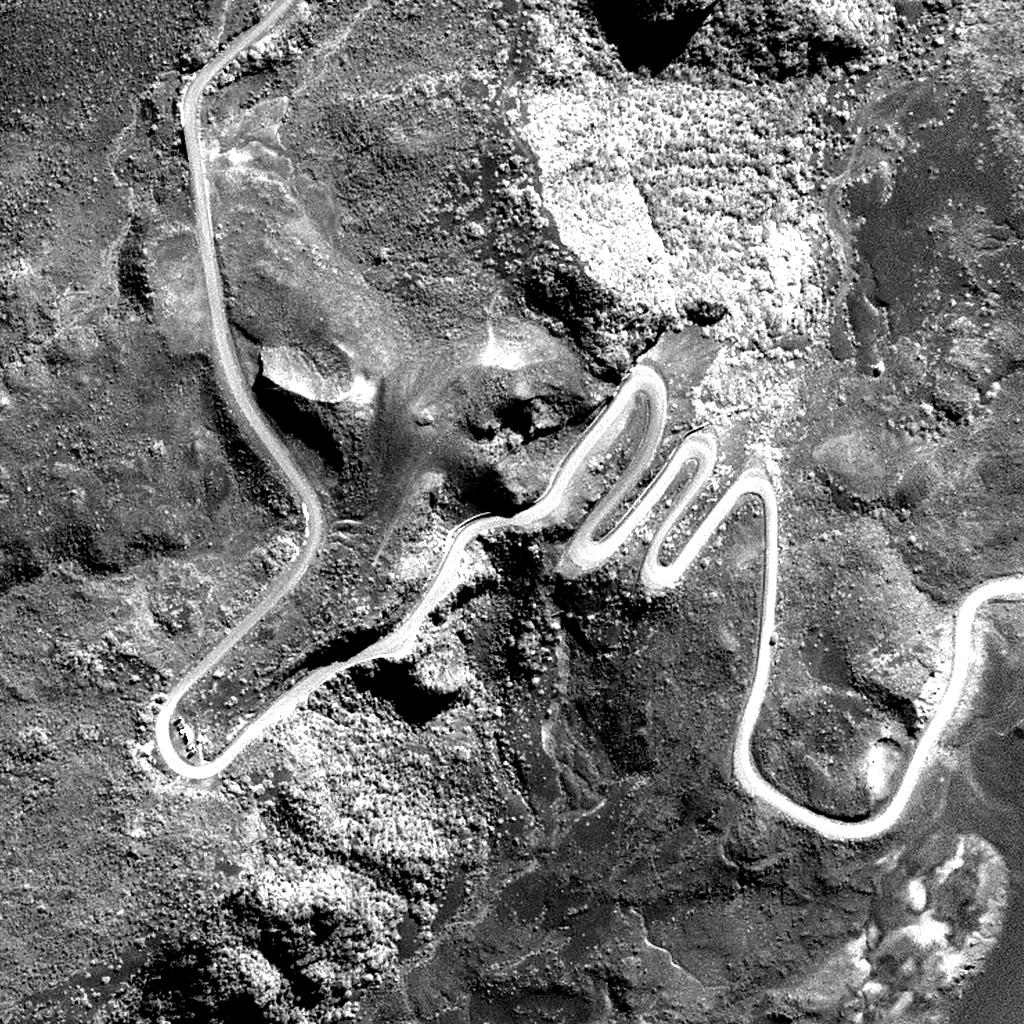
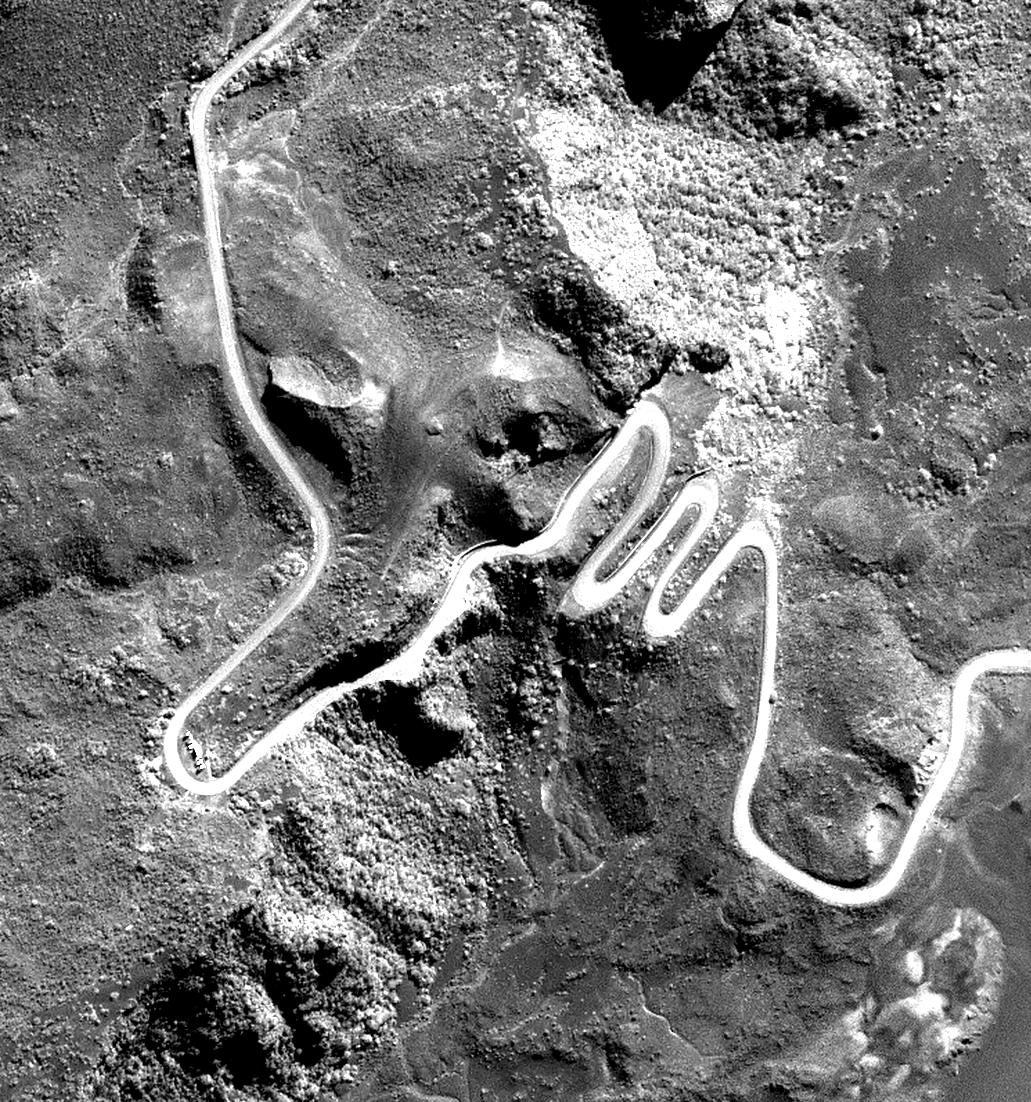

In [31]:
data_loader.display_images(images_name)

Dimension:  (700, 700, 1)
Dimension:  (700, 700, 1)



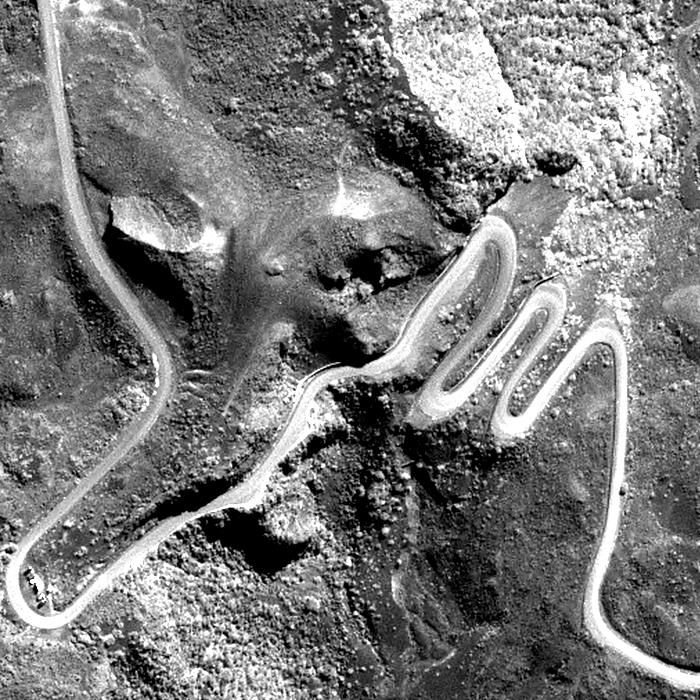
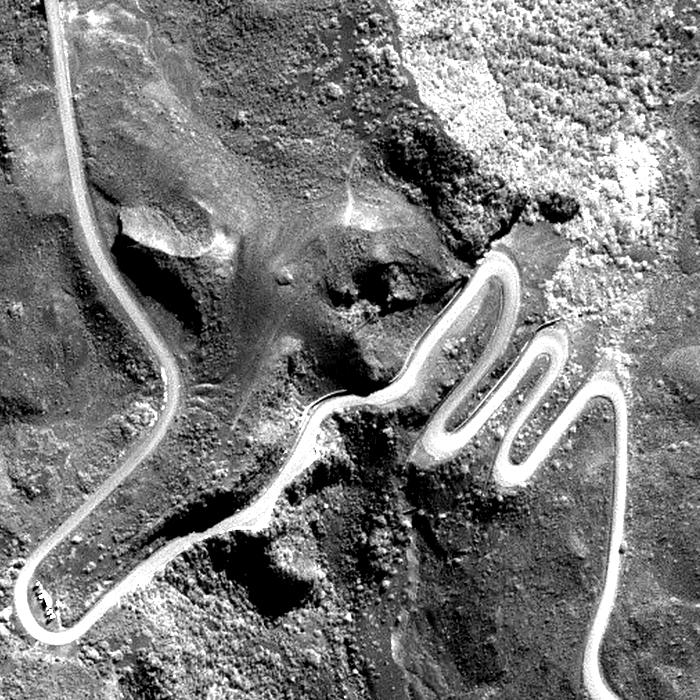

TypeError: 'NoneType' object is not iterable

In [32]:
l,g = data_loader.display_images(images_name, roi)

# Execution of s2p on Plantet's data

In [36]:
# Number of variable to optimize when correction pointing error
# 0 = use translation
# 2 = only translation enable in optimizer
# 3 = Translation + Rotation
# 5 = Translation + Rotation + center
data_loader.write_json(images_name, tile_size=tile_size, num_variable=3, roi=roi, rpc_name=rpc_name)

In [37]:
!rm -rf output && cd .. && python3 s2p.py yaw_extension/config.json

out_dir is: /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output
tile size: 350 350
total number of tiles: 4 (2 x 2)

discarding masked tiles...
done 1 / 4 tildone 2 / 4 tildone 3 / 4 tildone 4 / 4 tiles
Elapsed time: 0:00:00.140505

correcting pointing locally...
correcting pointing on tile 150 150 pair 1...

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_01.tif 150 150 350 350 --thresh-dog 0.013300 -o /tmp/s2p_mp_avpj5.txt
0:00:00.416718

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_02.tif -99 30 635 1707 --thresh-dog 0.013300 -o /tmp/s2p_lw9vxdqr.txt
0:00:01.683640

RUN: matching /tmp/s2p_mp_avpj5.txt /tmp/s2p_lw9vxdqr.txt -relative 0.600000 -o /tmp/s2p_j2w_hf72.txt -f "-0.6913884926201382 -0.14666768620323314 0.691853988225002 0.14767735463977585 7.726797205383484"
331 matches
0:00:00.711690

RUN: ransac fmn 1000 .3 7 /tmp/s2p_j2w_hf72.txt < /tmp/s2p_j2w_hf72.txt
pmean = 344.543 305.96 353.

Input file size is 1031, 1102
Warning 1: -srcwin 250 36 635 1707 falls partially outside raster extent. Going on however.
0...10...20...30...40...50...60...70...80...90...100 - done.
0:00:00.055695

RUN: qauto /tmp/s2p_sphhahrl.tif /tmp/s2p_wl9iizam.png
qauto: rminmax = 0 381
0:00:00.113590

RUN: cp /tmp/s2p_2ic0fm03.png /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output/tiles/row_0000150_height_350/col_0000500_width_350/pair_1/sift_matches_pointing.png
0:00:00.007637
done 2 / 4 tilcorrecting pointing on tile 150 500 pair 1...

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_01.tif 150 500 350 350 --thresh-dog 0.013300 -o /tmp/s2p_7i1n3egq.txt
0:00:00.452977

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_02.tif -99 382 635 1707 --thresh-dog 0.013300 -o /tmp/s2p_3imrsjev.txt
0:00:01.255344

RUN: matching /tmp/s2p_7i1n3egq.txt /tmp/s2p_3imrsjev.txt -relative 0.600000 -o /tmp/s2p_jxwte6qt.txt -f "

0:00:00.008294
done 4 / 4 tiles
Elapsed time: 0:00:16.786400

correcting pointing globally...
Elapsed time: 0:00:00.008040

rectifying tiles...
rectifying tile 150 150 pair 1...
reference image:
	rotation: 81.507650 deg
	zoom: 1.000471
	vertical translation: 5.212258

secondary image:
	rotation: 81.541040 deg
	zoom: 0.999530
	vertical translation: -5.212258
max, min, mean rectification error on point matches:  0.038497276273574244 0.00037335155303708234 0.01589111195321334
Residual vertical disparities: max, min, mean. Should be zero
0.4962353009823346 -0.41724486619145296 0.011586372004228655

RUN: gdal_translate -ot Float32 -co TILED=YES -co BIGTIFF=IF_NEEDED -srcwin 150 150 350 350 '/Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_01.tif' '/tmp/s2p_0sdb4gjo.tif'
Input file size is 1024, 1024
0...10...20...30...40...50...60...70...80...90...100 - done.
0:00:00.068525

RUN: qauto /tmp/s2p_0sdb4gjo.tif /tmp/s2p_ohvui5iz.png
qauto: rminmax = 116 398
0:00:00.02

 - recursive call                  : (ms) = 18.2798
 - gaussianConvolution             : (ms) = 1.89953
 - prepareSpline                   : (ms) = 6.867
 - interpolateSpline               : (ms) = 9.94655
 - put the mask back               : (ms) = 0.616017
0:00:00.083449
done 3 / 4 tilrectifying tile 500 500 pair 1...
reference image:
	rotation: 81.508340 deg
	zoom: 1.000457
	vertical translation: 5.450093

secondary image:
	rotation: 81.514611 deg
	zoom: 0.999543
	vertical translation: -5.450093
max, min, mean rectification error on point matches:  0.03846205434331296 0.00036797690927414806 0.015872241165639026
Residual vertical disparities: max, min, mean. Should be zero
0.47827816815458846 -0.4877158511504831 0.02596135974266104

RUN: gdal_translate -ot Float32 -co TILED=YES -co BIGTIFF=IF_NEEDED -srcwin 500 500 350 350 '/Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_01.tif' '/tmp/s2p_xrgv9m2f.tif'
Input file size is 1024, 1024
0...10...20...30...40...

In [38]:
tiles_path = visualization.get_tiles_path()
print(tiles_path)
tile_path = tiles_path[0]

['./output/tiles/row_0000500_height_350/col_0000500_width_350/pair_1', './output/tiles/row_0000500_height_350/col_0000150_width_350/pair_1', './output/tiles/row_0000150_height_350/col_0000500_width_350/pair_1', './output/tiles/row_0000150_height_350/col_0000150_width_350/pair_1']


# Retrieve computed values

In [39]:
im_list = visualization.get_images()
im1 = im_list[0]
im2 = im_list[1]

../testdata/input_pair/img_01.tif
../testdata/input_pair/img_02.tif


In [40]:
m = visualization.get_matches(tile_path)
F = visualization.get_affine_fundamental_matrix(tile_path)
A = visualization.get_correction_matrix(tile_path)
print(A)

[[ 9.99999109e-01  1.33507585e-03  2.42686500e-06]
 [-1.33507585e-03  9.99999109e-01  5.11908000e-07]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


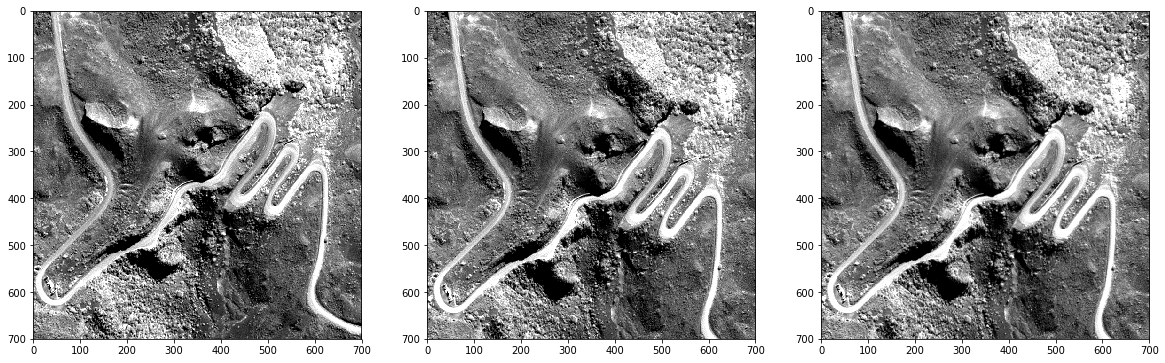

In [41]:
im2_corrected = visualization.visualize_transformation(im1, im2, A)

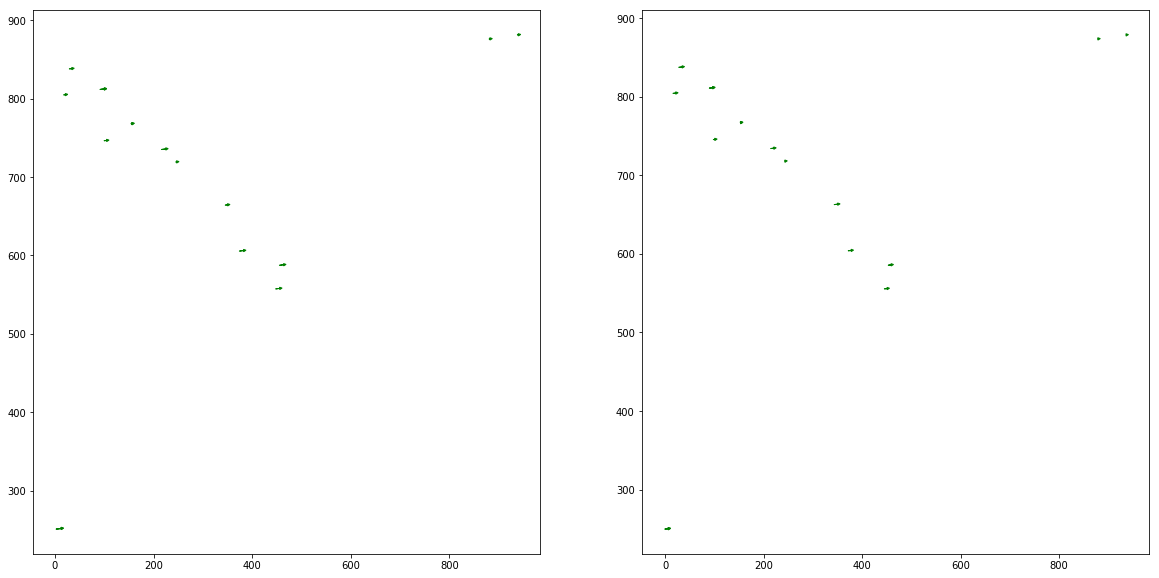

In [20]:
%matplotlib inline
e_2, e_3 = visualization.visualize_pointing_error(F, m, A)

In [21]:
print("error without pointing error correction:", e_2)
print("error with pointing error correction:", e_3)

error without pointing error correction: 99.34556224845885
error with pointing error correction: 75.45629302619301


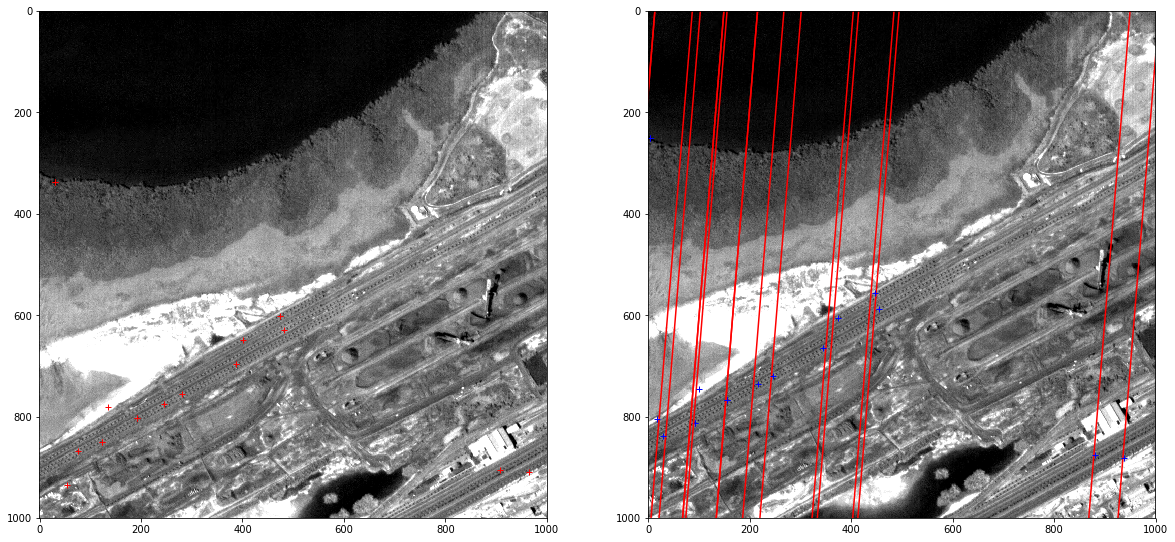

In [22]:
visualization.visualize_epipolar(im1, im2, F, m)

In [17]:
m

array([[481.227, 630.096, 455.222, 587.458],
       [386.606, 697.237, 345.273, 664.258],
       [280.406, 755.328, 244.836, 719.258],
       [245.184, 774.572, 216.193, 735.27 ],
       [122.186, 849.363,  91.615, 811.847],
       [122.186, 849.363,  91.615, 811.847],
       [ 74.861, 867.708,  29.2  , 838.11 ],
       [473.734, 600.765, 447.422, 557.286],
       [907.749, 905.211, 880.168, 876.277],
       [964.247, 909.774, 937.57 , 881.514],
       [400.979, 648.23 , 373.971, 605.567],
       [191.502, 802.584, 154.402, 768.112],
       [191.502, 802.584, 154.402, 768.112],
       [ 30.218, 337.276,   2.569, 250.745],
       [ 30.218, 337.276,   2.569, 250.745],
       [ 53.65 , 935.617,  17.564, 804.948],
       [134.13 , 780.107,  99.698, 746.412]])

In [87]:
a_ref = key + '/rectified_ref.tif'
a_sec = key + '/rectified_sec.tif'
ipytools.display_gallery([ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)), ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec))])

NameError: name 'key' is not defined

In [88]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)))

NameError: name 'a_ref' is not defined

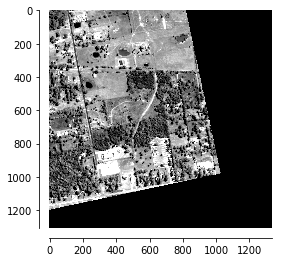

In [220]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec)))

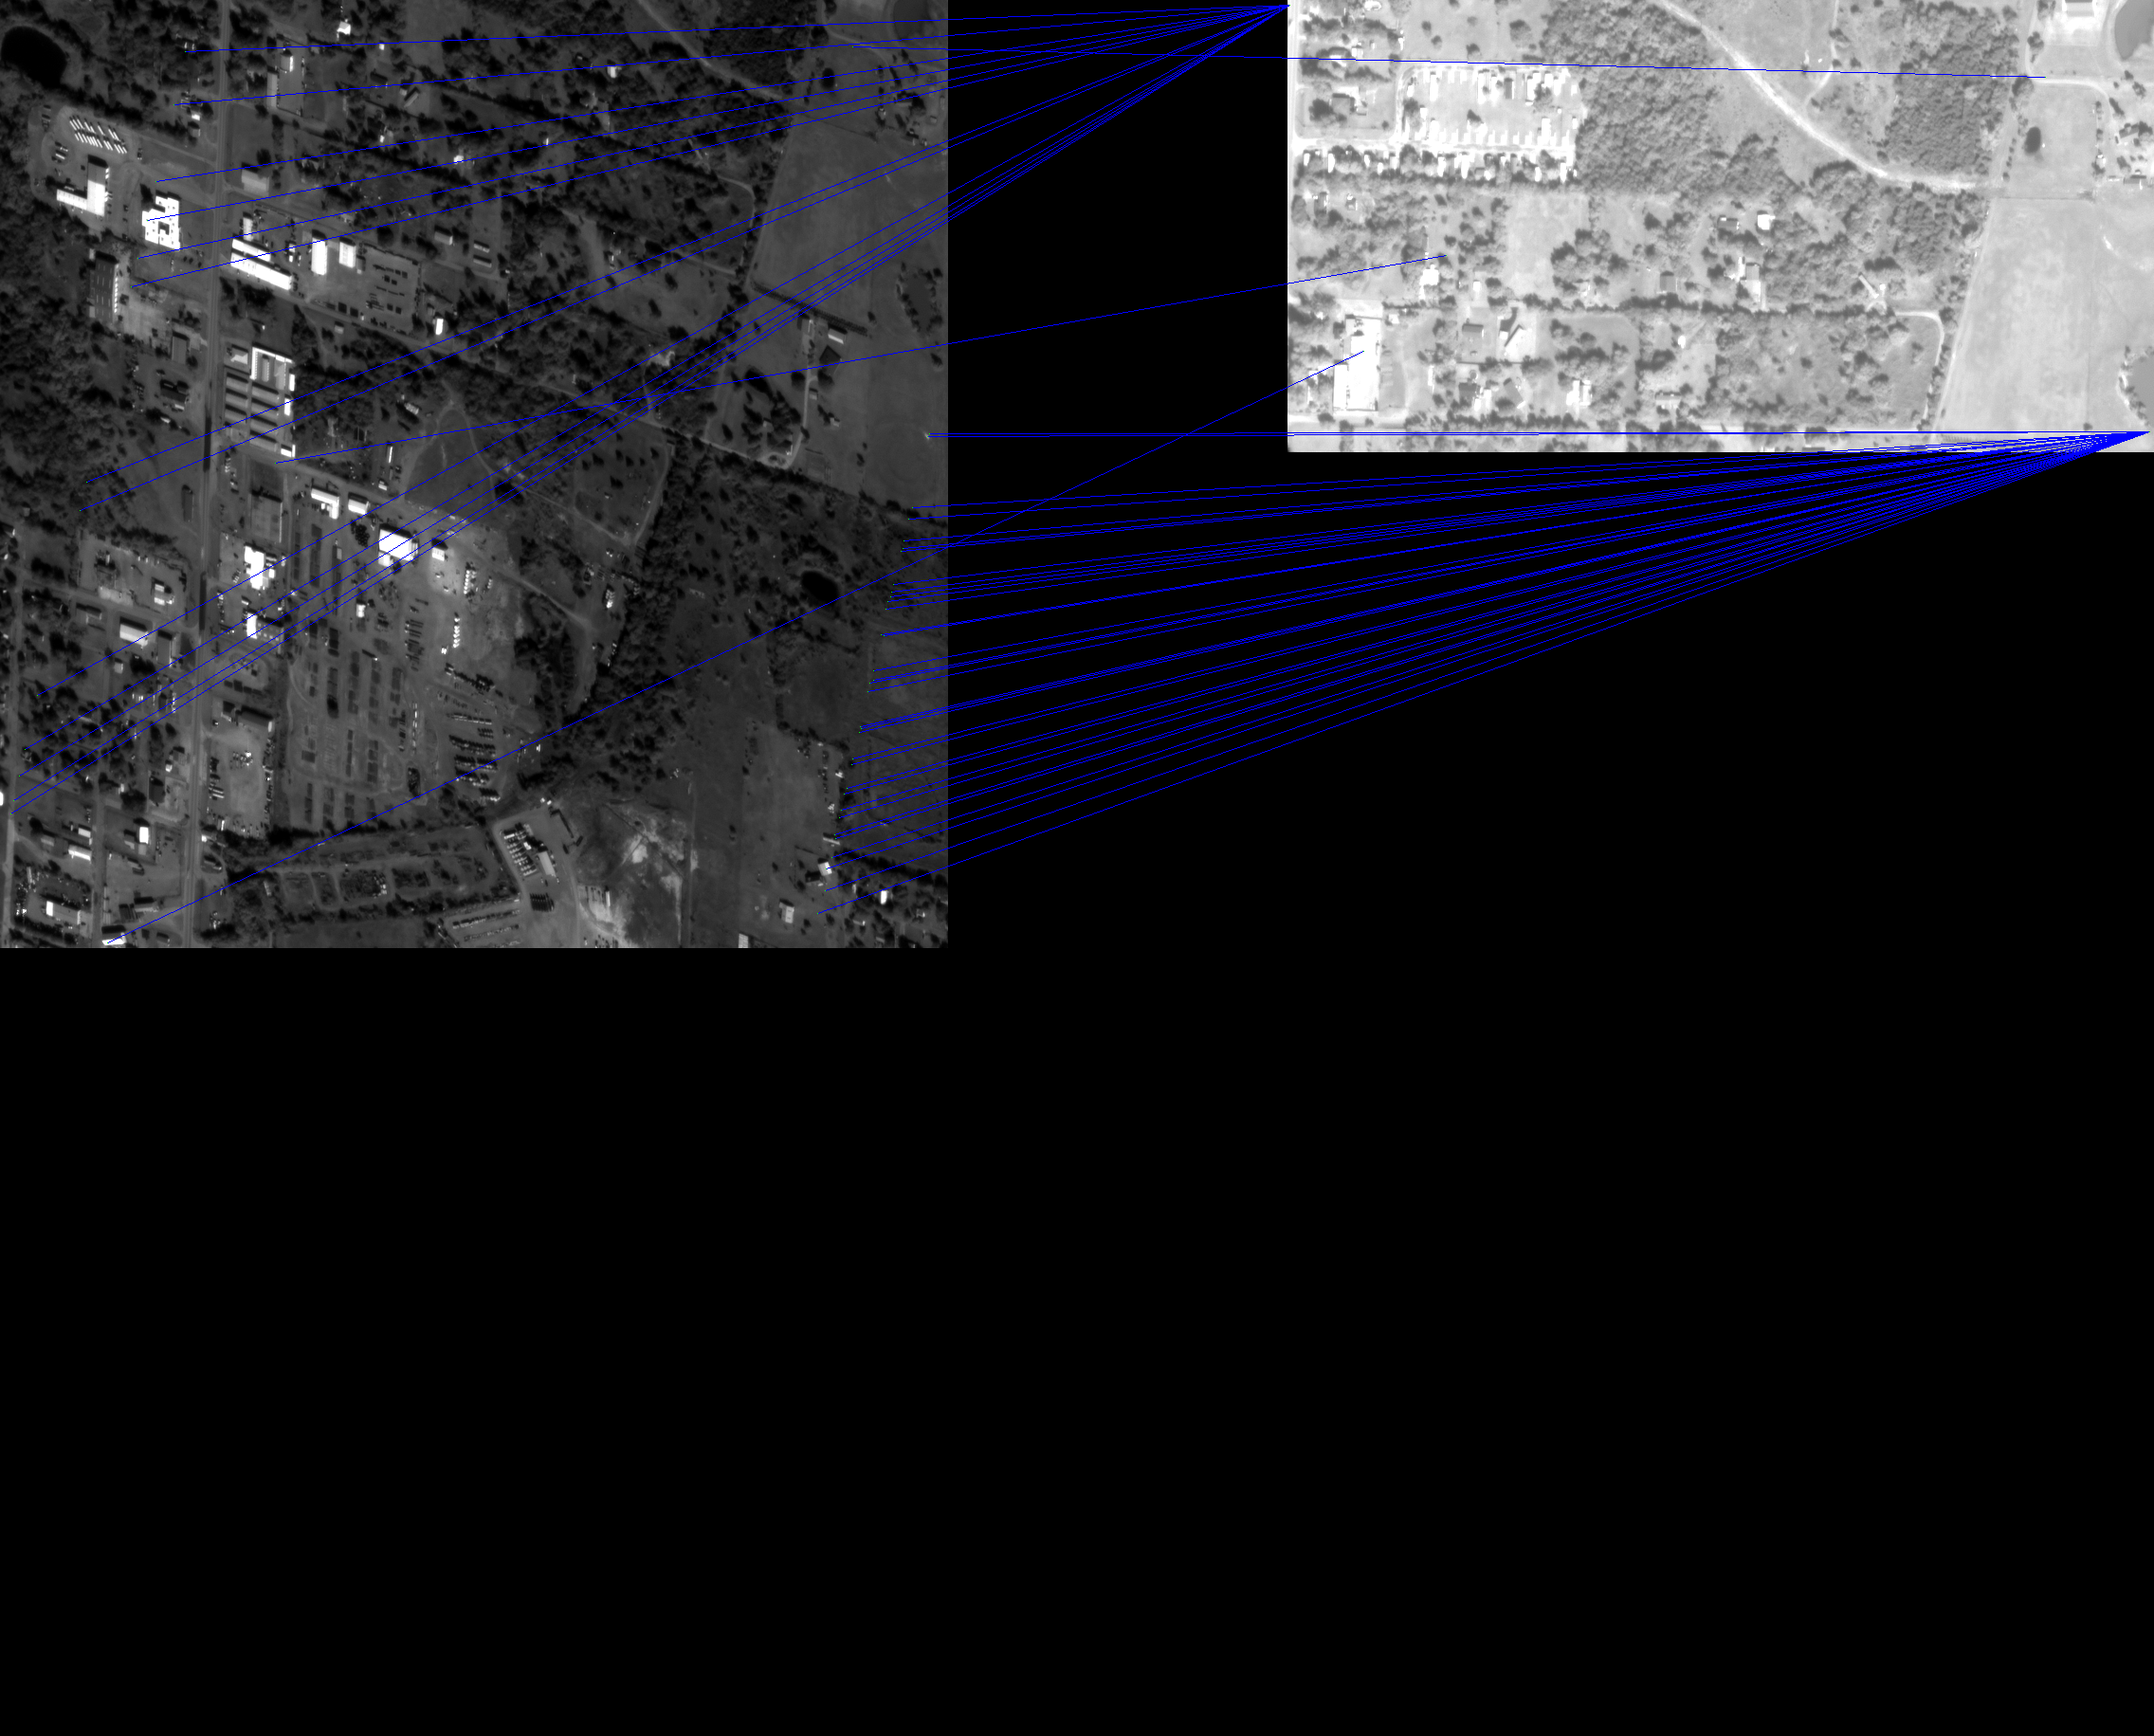

In [221]:
from IPython.display import Image
filename = key + '/sift_matches_pointing.png'
Image(filename=filename) 

In [106]:
expected_output = './output/s03_20161003T161107Z/dsm.tif'
a = readGTIFF(expected_output)

RasterioIOError: ./output/s03_20161003T161107Z/dsm.tif: No such file or directory

<IPython.core.display.Javascript object>


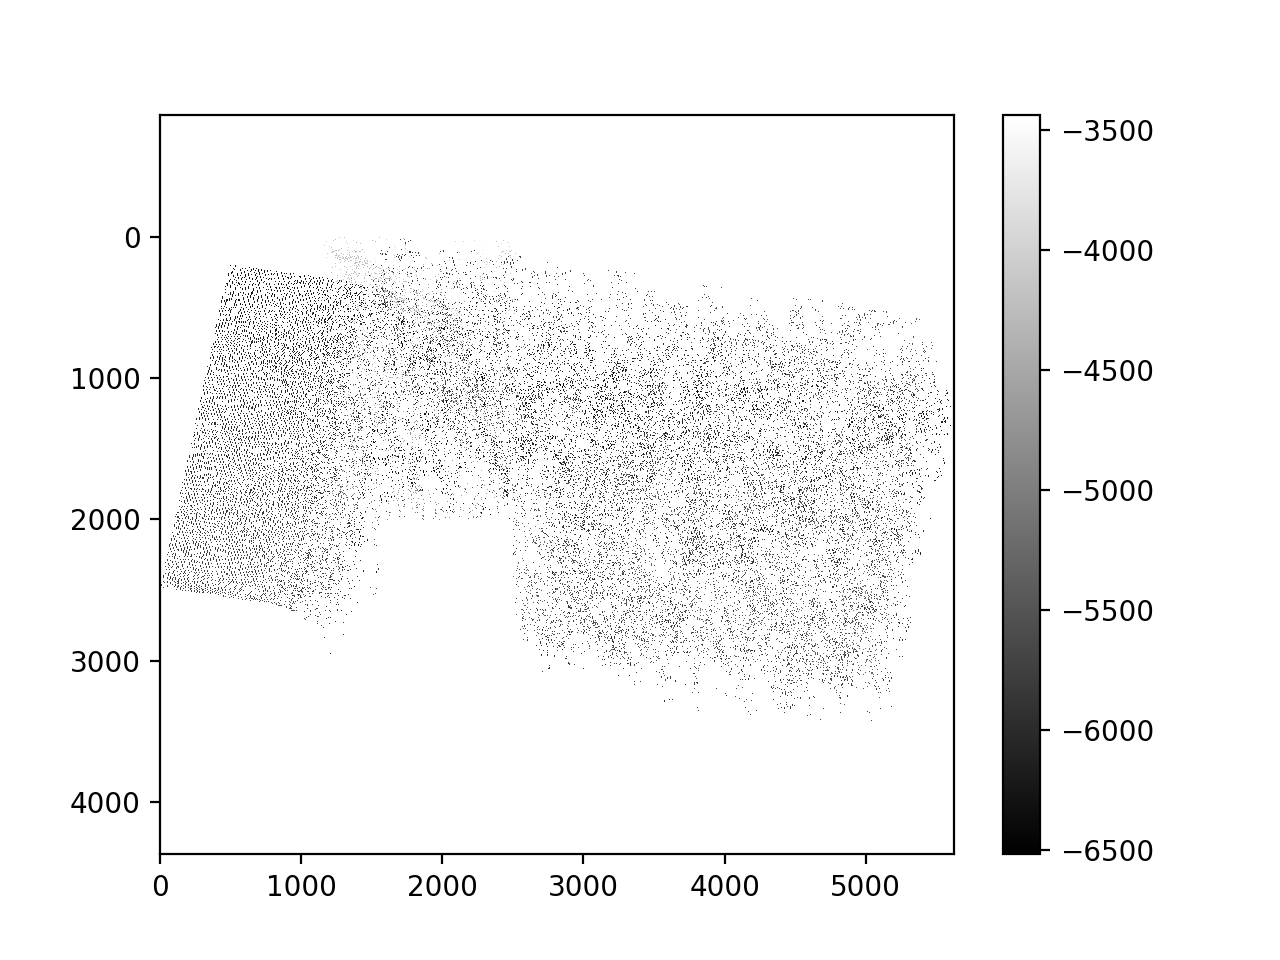

In [18]:
b = a#readGTIFF('/Users/juleskozolinsky/Projets/s2p/yaw_extension/output/s03_20161003T161107Z/tiles/row_0000000_height_500/col_0001000_width_500/dsm.tif')
display_imshow(b)